In [14]:
import matplotlib.pyplot as plt
import numpy as np

T = 2.0

In [218]:
def lj_func(lambd, r, sigma = 1, eps = 1):
    if r == 0:
        r = 1E-10

    temp = lambd**5 * (sigma / r)**12 - lambd**3 * (sigma / r)**6
    return 4 * eps * temp

def lj_potential(lambd, r_range, sigma = 1, eps = 1):
    res = []
    for r in r_range:
        res.append(lj_func(lambd, r, sigma, eps))
    return res

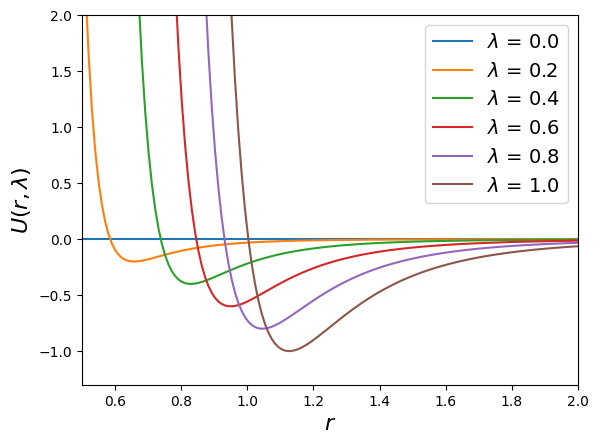

In [225]:
rstart, rend = 0.5, 2
r_range = np.arange(rstart, rend, 0.01)
x = np.linspace(rstart, rend, len(r_range))
for k in [.0, .2, .4, .6, .8, 1.0]:
    potential = lj_potential(lambd=k, r_range=r_range)
    plt.plot(x, potential, label=f'$\lambda$ = {k}')

plt.xlim(rstart, rend)
plt.ylim(-1.3, 2)
plt.xlabel(r'$r$', fontsize=16)  
plt.ylabel(r'$U(r, \lambda)$', fontsize=16)  
plt.legend(fontsize=14)  

plt.savefig('figures/modified_lj.png', dpi=400)

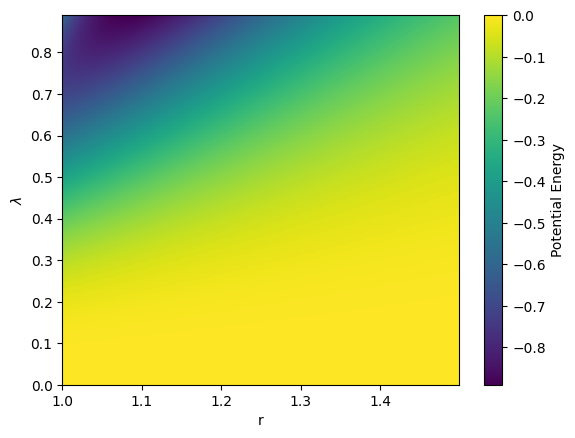

In [122]:
r_range = np.arange(1, 1.5, 0.001)
lambd_range = np.arange(0, 0.9, 0.01)

arr = []
for k in lambd_range:
    potential = lj_potential(lambd=k, r_range=r_range)
    arr.append(potential)

arr = np.array(arr)

plt.imshow(arr, extent=[min(r_range), max(r_range), min(lambd_range), max(lambd_range)],
            aspect='auto', origin='lower', cmap='viridis')
plt.xlabel('r')
plt.ylabel(r'$\lambda$')
plt.colorbar(label='Potential Energy')
plt.show()

-0.13682601916666667


Text(0, 0.5, '$dU / d\\lambda $')

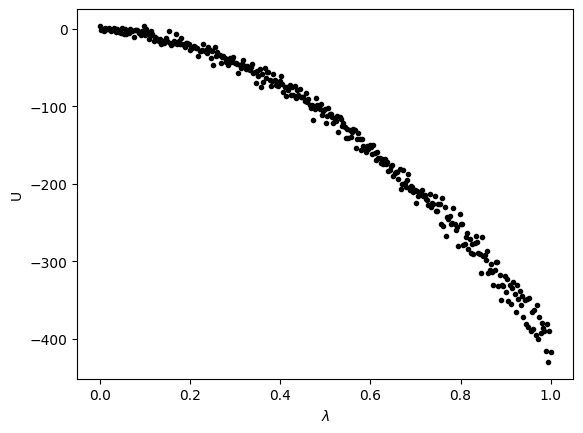

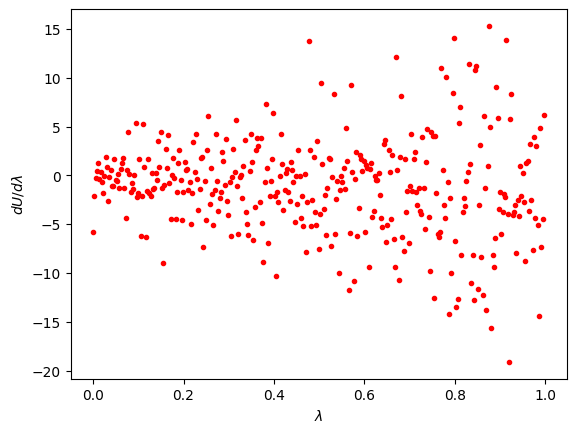

In [203]:
with open("total_energies") as file:
    lines = file.readlines()
    total_energies = [float(line) for line in lines]

D_energy = np.gradient(total_energies)[:-1]

print(np.trapz([elem / 3000 for elem in D_energy]))

x = np.linspace(0, 1, len(total_energies))
plt.plot(x, total_energies, 'k.')
plt.xlabel(r'$\lambda$')
plt.ylabel('U')

plt.figure()
plt.plot(x[:-1], D_energy, 'r.')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$dU / d\lambda $')


(-2000.0, 10000.0)

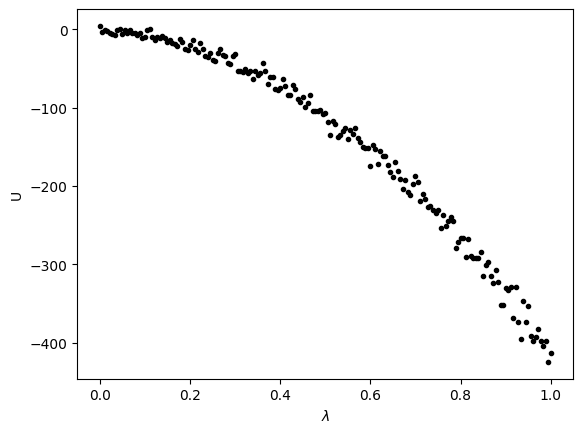

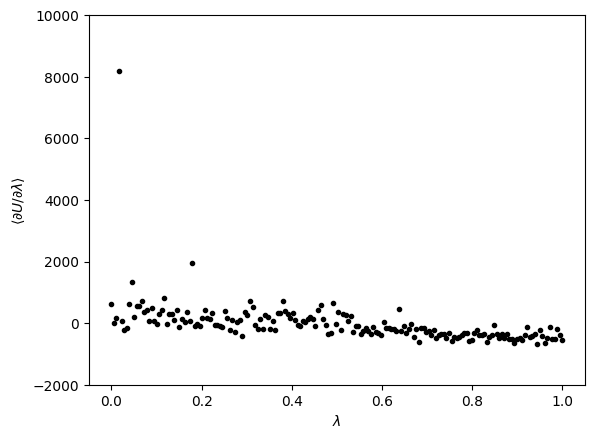

In [246]:
with open("total_energies") as file:
    lines = file.readlines()
    total_energies = [float(line) for line in lines]

total_energies_production = []
for i, elem in enumerate(total_energies):
    if i % 2 == 1:
        total_energies_production.append(elem)

x = np.linspace(0, 1, len(total_energies_production))
plt.plot(x, total_energies_production, 'k.')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'U')


with open("total_der_energies") as file:
    lines = file.readlines()
    total_der_energies = [float(line) for line in lines]
    
total_der_energies_production = []
for i, elem in enumerate(total_der_energies):
    if i % 2 == 1:
        total_der_energies_production.append(elem)

x = np.linspace(0, 1, len(total_der_energies_production))
plt.figure()
plt.plot(x, total_der_energies_production, 'k.')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\langle \partial U/ \partial \lambda \rangle$')
plt.ylim(-2000, 10000)

In [263]:
num_production_cycles = 7000
avg_der_energies = [elem / num_production_cycles for elem in total_der_energies_production]

integral_value = np.trapz(avg_der_energies)

print(integral_value)


-0.327770540714285


-208.42766


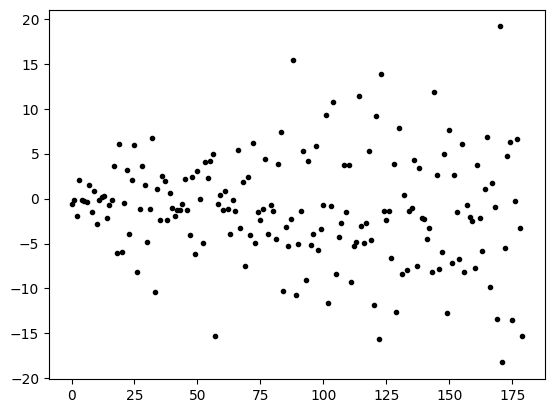

In [199]:
D_energy_production = []
for i, elem in enumerate(D_energy):
    if i % 2 == 1:
        D_energy_production.append(elem)

plt.plot(D_energy_production, 'k.')

print(np.trapz(D_energy_production))

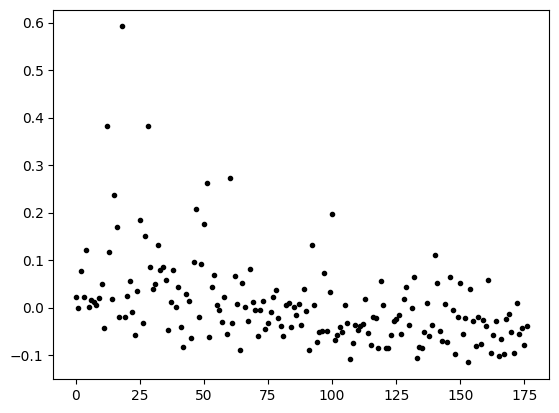

In [216]:
my_list = avg_der_energies.copy()
n = 4

# Find the indices of the n largest values
indices_to_remove = sorted(range(len(my_list)), key=lambda i: my_list[i], reverse=True)[:n]

# Remove the values at the identified indices
removed_values = [my_list.pop(i) for i in sorted(indices_to_remove, reverse=True)]

plt.plot(my_list, 'k.')

In [217]:
np.trapz(my_list)

1.3507094900000003

In [202]:
from scipy.integrate import quad

# Your list of function values
function_values = avg_der_energies.copy()

# Assuming x values are just indices from 0 to len(function_values)
x_values = np.arange(len(function_values))

# Perform linear regression to fit a line
coefficients = np.polyfit(x_values, function_values, 1)

# Define the fitted line function
fitted_line = np.poly1d(coefficients)

# Define the integrand function (the fitted line function)
def integrand(x):
    return fitted_line(x)

# Define the integration limits (for example, from 0 to the maximum x value)
integration_limits = [0, len(function_values) - 1]

# Perform integration
result, error = quad(integrand, *integration_limits)

print("Result of integration:", result)

Result of integration: -1.225844517050292


In [248]:
deren_list = []
integr_list = []
sigma_values = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]

for s in sigma_values:
    with open('main_simulation_data/der_energies_' + str(s), 'r') as file:
        lines = file.readlines()
        deren = [float(line) for line in lines]
        
        deren_list.append(deren)
        integr_list.append(np.trapz(deren))

In [260]:
integr_list

[848919.6509499999,
 657137.0650599999,
 383368.21467,
 174170.714135,
 576193.15466,
 6904534.943089999,
 53400870.17393499,
 109542142.56036]

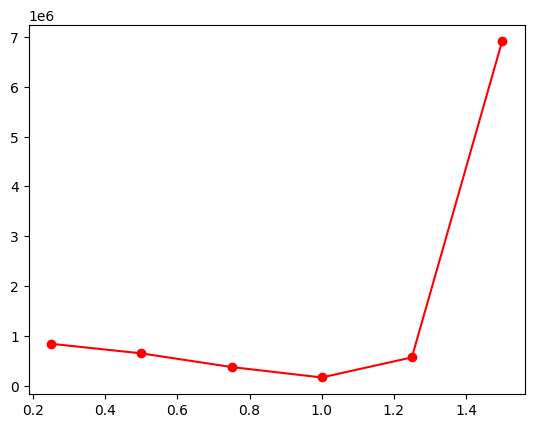

In [261]:
plt.plot(sigma_values[:6], integr_list[:6], 'ro-')